In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('bhp.csv')

In [25]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [26]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

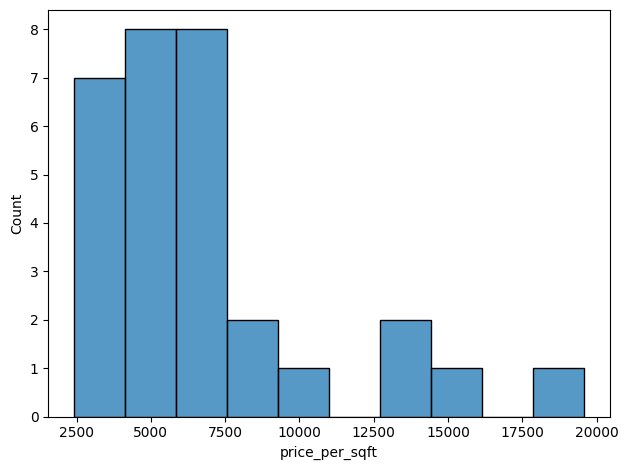

In [27]:
sns.histplot(df['price_per_sqft'].sample(30))
plt.tight_layout()

In [28]:
min_threshold, max_threshold = df['price_per_sqft'].quantile([.001, 0.999])

In [29]:
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [30]:
df_0 = df[(df['price_per_sqft'] > min_threshold) & (df['price_per_sqft'] <= max_threshold)]

In [31]:
df.shape, df_0.shape

((13200, 7), (13172, 7))

In [32]:
df.shape[0] - df_0.shape[0]

28

In [33]:
std_4_min = df_0['price_per_sqft'].mean() - 4 * df_0['price_per_sqft'].std()
std_4_max = df_0['price_per_sqft'].mean() + 4 * df_0['price_per_sqft'].std()
std_4_max = float(std_4_max)
std_4_min = float(std_4_min)
std_4_min, std_4_max

(-9900.429065502582, 23227.73653589432)

In [34]:
df_1 = df_0[(df_0['price_per_sqft'] > std_4_min) & (df_0['price_per_sqft'] < std_4_max)]

In [35]:
df.shape, df_0.shape, df_1.shape

((13200, 7), (13172, 7), (13047, 7))

In [36]:
df_0.shape[0] - df_1.shape[0]

125

<Axes: xlabel='price_per_sqft', ylabel='Count'>

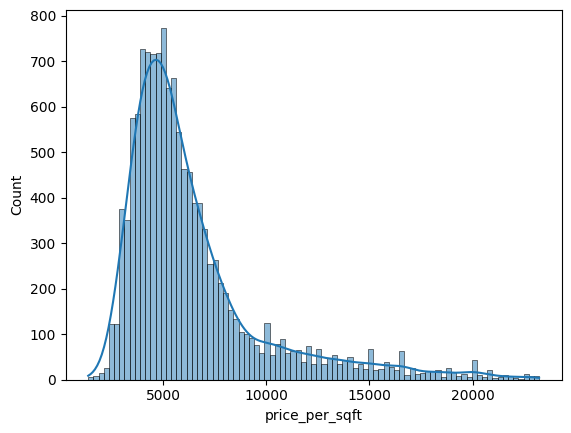

In [37]:
sns.histplot(df_1['price_per_sqft'], kde=True)

In [38]:
df_0['Z-Score'] = (df_0['price_per_sqft'] - df_0['price_per_sqft'].mean())/df_0['price_per_sqft'].std()

C:\Users\rajoh\AppData\Local\Temp\ipykernel_13016\2055018264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Z-Score'] = (df_0['price_per_sqft'] - df_0['price_per_sqft'].mean())/df_0['price_per_sqft'].std()


In [39]:
df_0

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z-Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [40]:
df_new = df_0[(df_0['Z-Score'] > -4) & (df_0['Z-Score'] < 4)]

In [41]:
df_new.shape

(13047, 8)

In [42]:
df_0.shape

(13172, 8)

In [43]:
df.shape, df_0.shape, df_1.shape, df_new.shape

((13200, 7), (13172, 8), (13047, 7), (13047, 8))